In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import Corpus

In [3]:
os.chdir('convokit/thread_generator')

In [4]:
from convokit.thread_generator import ThreadSpawner

In [141]:
# random 25% reciprocal throughout
t_spawner1 = ThreadSpawner(participant_factor=20, recip_factor=lambda k: 0.405, expansion_factor=lambda k: 0.5)
utts = t_spawner1.spawn_thread(thread_index=1, length=25)
for idx, utt in enumerate(utts):
    utt.meta['order'] = idx + 1
    utt.meta['class'] = 1
Corpus(utterances=utts).get_conversation('1-1').print_conversation_structure(lambda utt: str(utt.meta['order']) + ". " + utt.user.id)

1. 0x1
    2. 0x2
        3. 0x19
        6. 0x3
            7. 0x1d
                8. 0x3
                    9. 0x1d
                        11. 0x18
                    10. 0x17
    4. 0xf
        5. 0x19
        23. 0x21
    12. 0x4
    13. 0x15
        14. 0x4
    15. 0x23
    16. 0xe
        17. 0x23
        21. 0x2
            22. 0x27
            24. 0xc
                25. 0x21
    18. 0x10
        19. 0x23
    20. 0x27


In [6]:
from convokit import HyperConvo


In [45]:
hc = HyperConvo(prefix_len=20)
corpus = Corpus(utterances=utts)
hc.fit_transform(corpus)
corpus.random_conversation().meta['hyperconvo']['count[reciprocity motif]']

6

In [125]:
def recip_lambda(k):
    if k <= 7:
        return 0.77
    else:
        return 0.1

t_spawner2 = ThreadSpawner(participant_factor=20, recip_factor=recip_lambda, 
                           expansion_factor=lambda k: 0.5)
utts = t_spawner2.spawn_thread(thread_index=1, length=25)
for idx, utt in enumerate(utts):
    utt.meta['order'] = idx + 1
    utt.meta['class'] = 2
Corpus(utterances=utts).get_conversation('1-1').print_conversation_structure(lambda utt: str(utt.meta['order']) + ". " + utt.user.id)

1. 0x1
    2. 0x2
    3. 0x27
        4. 0x2
            5. 0x1c
                6. 0x2
                    7. 0x1c
                        8. 0x2
    9. 0xc
        13. 0x1d
        20. 0x26
            21. 0x17
    10. 0x20
    11. 0xa
        12. 0x8
    14. 0x25
        15. 0x19
    16. 0xd
    17. 0x1e
    18. 0x19
        19. 0x1e
    22. 0x1b
        23. 0x17
            24. 0x1b
    25. 0xb


In [126]:
hc = HyperConvo(prefix_len=20)
corpus = Corpus(utterances=utts)
hc.fit_transform(corpus)
corpus.random_conversation().meta['hyperconvo']['count[reciprocity motif]']

3

In [92]:
def recip_lambda(k):
    if k <= 15:
        return 0.1
    else:
        return 0.9
t_spawner3 = ThreadSpawner(participant_factor=20, recip_factor=recip_lambda, expansion_factor=lambda k: 0.5)
utts = t_spawner3.spawn_thread(thread_index=1, length=25)
for idx, utt in enumerate(utts):
    utt.meta['order'] = idx + 1
    utt.meta['class'] = 3
Corpus(utterances=utts).get_conversation('1-1').print_conversation_structure(lambda utt: str(utt.meta['order']) + ". " + utt.user.id)    

1. 0x1
    2. 0x2
        3. 0x13
        14. 0x1d
    4. 0x19
        5. 0x1a
    6. 0xa
    7. 0x4
        8. 0xa
            15. 0x1c
                16. 0x1d
                    17. 0x1c
                        18. 0x1d
                            19. 0x1c
                                20. 0x1d
                                    21. 0x1c
                                        22. 0x1d
                                            23. 0x1c
    9. 0xe
        10. 0xa
            12. 0x1e
                13. 0x16
    11. 0x16
    24. 0x13
        25. 0x1c


In [93]:
hc = HyperConvo(prefix_len=20)
corpus = Corpus(utterances=utts)
hc.fit_transform(corpus)
corpus.random_conversation().meta['hyperconvo']['count[reciprocity motif]']

4

## Corpus generation

In [142]:
all_utts = []

In [143]:
group_size = 5000

In [144]:
LENGTH=25
for thread_idx in range(1, group_size+1):
    utts = t_spawner1.spawn_thread(thread_idx, length=LENGTH)
    for utt in utts: utt.meta['subreddit'] = '1.focused->expansionary'
    all_utts.extend(utts)

for thread_idx in range(group_size+1, 2*group_size+1):
    utts = t_spawner2.spawn_thread(thread_idx, length=LENGTH)
    for utt in utts: utt.meta['subreddit'] = '2.expansionary->focused'
    all_utts.extend(utts)
    
for thread_idx in range(2*group_size+1, 3*group_size+1):
    utts = t_spawner3.spawn_thread(thread_idx, length=LENGTH)
    for utt in utts: utt.meta['subreddit'] = '3.dyadic_chain'
    all_utts.extend(utts)


In [145]:
len(all_utts)

375000

In [146]:
corpus = Corpus(utterances=all_utts)

In [147]:
corpus.print_summary_stats()

Number of Speakers: 40
Number of Utterances: 375000
Number of Conversations: 15000


In [148]:
from functools import reduce

In [149]:
for convo in corpus.iter_conversations():
    convo.meta['prob'] = reduce(lambda x, y: x * y, [utt.meta['prob'] for utt in convo.iter_utterances()])

In [150]:
from convokit import HyperConvo

In [151]:
hc20 = HyperConvo(prefix_len=20, feat_name='hyperconvo-20', invalid_val=-1)

In [152]:
hc20.fit_transform(corpus)

In [153]:
for convo in corpus.iter_conversations():
    convo.meta['group'] = int(next(convo.iter_utterances()).meta['subreddit'][0])

In [166]:
import pandas as pd
df = corpus.get_conversations_dataframe()
df_subset = df[['meta.group', 'meta.hyperconvo-20']]
hc_dicts = {df_subset.iloc[idx].name: df_subset.iloc[idx]['meta.hyperconvo-20'] for idx in range(len(df_subset))}
df_hc = pd.DataFrame(hc_dicts).T.astype('float64')
df_combi_20 = pd.concat([df_subset, df_hc], axis=1, sort=False)

In [168]:
means_20 = df_combi_20.groupby('meta.group').mean() #.to_csv('~/Desktop/agg_means.csv')
# percent_diff = (means.iloc[0] - means.iloc[1])*2 / (means.iloc[0] + means.iloc[1] + 0.00001)
# sum(percent_diff)
means_20[['count[reciprocity motif]']]

count[reciprocity motif]
meta.group                          
1                             4.1904
2                             4.1856
3                             4.1260

In [169]:
means_20

2nd-argmax[indegree over C->C mid-thread responses]  \
meta.group                                                        
1                                                      2.1290     
2                                                      1.4226     
3                                                      2.2936     

            2nd-argmax[indegree over C->C responses]  \
meta.group                                             
1                                             2.0838   
2                                             1.5110   
3                                             2.1050   

            2nd-argmax[indegree over C->c mid-thread responses]  \
meta.group                                                        
1                                                      4.4398     
2                                                      3.0330     
3                                                      3.9826     

            2nd-argmax[indegree over C->c responses]  \
meta.group                                             
1                                             3.8664   
2                                             3.2318   
3                                             2.9438   

            2nd-argmax[indegree over c->c mid-thread responses]  \
meta.group                                                        
1                                                      4.4398     
2                                                      3.0330     
3                                                      3.9826     

            2nd-argmax[indegree over c->c responses]  \
meta.group                                             
1                                             3.8664   
2                                             3.2318   
3                                             2.9438   

            2nd-argmax[outdegree over C->C mid-thread responses]  \
meta.group                                                         
1                                                      3.7862      
2                                                      2.5284      
3                                                      5.5532      

            2nd-argmax[outdegree over C->C responses]  \
meta.group                                              
1                                              3.7382   
2                                              3.2348   
3                                              5.9876   

            2nd-argmax[outdegree over C->c mid-thread responses]  \
meta.group                                                         
1                                                      3.7222      
2                                                      1.7424      
3                                                      7.5814      

            2nd-argmax[outdegree over C->c responses]  ...  \
meta.group                                             ...   
1                                              3.8854  ...   
2                                              1.7356  ...   
3                                              8.4596  ...   

            prop-nonzero[indegree over C->C mid-thread responses]  \
meta.group                                                          
1                                                    0.705598       
2                                                    0.473380       
3                                                    0.616868       

            prop-nonzero[indegree over C->C responses]  \
meta.group                                               
1                                             0.725467   
2                                             0.483758   
3                                             0.646748   

            prop-nonzero[indegree over C->c mid-thread responses]  \
meta.group                                                          
1                                                    0.549063       
2                                     

## Defining classification task

In [158]:
hc25 = HyperConvo(prefix_len=25, feat_name='hyperconvo-25', invalid_val=-1)

In [159]:
hc25.fit_transform(corpus)

In [170]:
df = corpus.get_conversations_dataframe()
df_subset = df[['meta.group', 'meta.hyperconvo-25']]
hc_dicts = {df_subset.iloc[idx].name: df_subset.iloc[idx]['meta.hyperconvo-25'] for idx in range(len(df_subset))}
df_hc = pd.DataFrame(hc_dicts).T.astype('float64')
df_combi_25 = pd.concat([df_subset, df_hc], axis=1, sort=False)

In [172]:
means_25 = df_combi.groupby('meta.group').mean() #.to_csv('~/Desktop/agg_means.csv')
# percent_diff = (means.iloc[0] - means.iloc[1])*2 / (means.iloc[0] + means.iloc[1] + 0.00001)
# sum(percent_diff)
means_25[['count[reciprocity motif]']]

count[reciprocity motif]
meta.group                          
1                             5.1744
2                             4.3618
3                             8.2142

In [180]:
df_compare = df_combi_20[['meta.group', 'count[reciprocity motif]']]

In [182]:
df_compare['reciprocity-25'] = df_combi_25['count[reciprocity motif]']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [188]:
df_compare['reciprocity-20'] = df_compare['count[reciprocity motif]']

In [190]:
del df_compare['count[reciprocity motif]']

In [197]:
df_compare['recip_div'] = df_compare['reciprocity-25'] / df_compare['reciprocity-20']

In [202]:
df_compare['recip_div_bool'] = df_compare['recip_div'] >= 1.5

In [204]:
df_compare.groupby('meta.group').mean()

reciprocity-25  reciprocity-20  recip_div  recip_div_bool
meta.group                                                           
1                   5.1744          4.1904        inf          0.2584
2                   4.3618          4.1856        inf          0.0294
3                   8.2142          4.1260        inf          0.9412

In [ ]:
hyperconv_range = range(2, 20+1)

In [ ]:
for hc_idx in hyperconv_range:
    hc = HyperConvo(prefix_len=hc_idx, feat_name="hyperconvo-{}".format(hc_idx), invalid_val=-1)
    hc.fit_transform(corpus)

In [207]:
corpus.dump('annotated-fake-trajectory-experiment', base_path='.')

## Quantize(?) the probs

In [26]:
from collections import defaultdict
from sklearn.preprocessing import QuantileTransformer
import numpy as np

In [27]:
probs = defaultdict(list)
for convo in corpus.iter_conversations():
    probs[convo.meta['group']].append(convo.meta['prob'])

In [28]:
import seaborn as sns

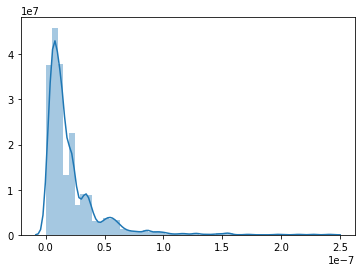

In [29]:
sns.distplot(probs[1])

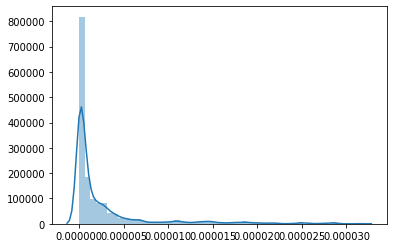

In [30]:
sns.distplot(probs[2])

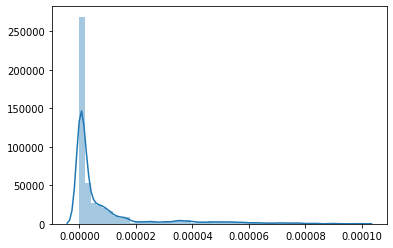

In [31]:
sns.distplot(probs[3])

In [32]:
qt = QuantileTransformer(n_quantiles=18)

In [33]:
percentiles = defaultdict(list)
for k, v in probs.items():
    probs[k] = np.array(v).reshape(-1, 1)
    mm = QuantileTransformer(n_quantiles=18)
    percentiles[k] = mm.fit_transform(probs[k])

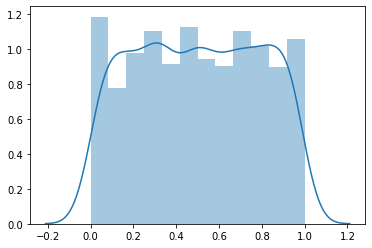

In [34]:
sns.distplot(qt.fit_transform(probs[1]))

In [ ]:
for idx, convo in enumerate(corpus.iter_conversations()):
    convo.meta['percentile'] = percentiles[convo.meta['group']][idx % 333][0]

In [ ]:
next(corpus.iter_conversations()).meta['percentile']

In [35]:
from convokit import HyperConvo

In [ ]:
# corpus = Corpus(filename='annotated-fake-trajectory-2')

In [ ]:
corpus.dump('annotated-fake-trajectory-experiment', base_path='.')

In [ ]:
# corpus = Corpus(filename='annotated-fake-trajectory-4')

In [38]:
import pandas as pd
df = corpus.get_conversations_dataframe()
df_subset = df[['meta.group', 'meta.hyperconvo-20']]
hc_dicts = {df_subset.iloc[idx].name: df_subset.iloc[idx]['meta.hyperconvo-20'] for idx in range(len(df_subset))}
df_hc = pd.DataFrame(hc_dicts).T.astype('float64')
df_combi = pd.concat([df_subset, df_hc], axis=1, sort=False)

In [40]:
means = df_combi.groupby('meta.group').mean() #.to_csv('~/Desktop/agg_means.csv')
# percent_diff = (means.iloc[0] - means.iloc[1])*2 / (means.iloc[0] + means.iloc[1] + 0.00001)
# sum(percent_diff)
means[['count[reciprocity motif]']]

count[reciprocity motif]
meta.group                          
1                           2.710000
2                           3.358667
3                           4.156000

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
percent_diff.sort_values()

In [ ]:
np.sum(np.sum(pd.isnull(percent_diff))) # NaN values

In [ ]:
from convokit import Utterance, Speaker

In [ ]:
not_json_serializable = np.uint64('99')

In [ ]:
import json

with open('tester.json', 'w') as f:
    json.dump(not_json_serializable, f)

In [ ]:
cp = Corpus(utterances=[Utterance(id='1', speaker=Speaker(id='hi'), meta={'binary': np.uint64('99')})])

In [ ]:
cp.view_utterances()